In [49]:
import matplotlib.pyplot as plt
from pycountry import countries
from countryinfo import CountryInfo
from datetime import datetime
x_date = datetime.now()

In [8]:
with open('regions.csv', 'r', encoding='utf-8') as f:
    data = f.read()
    data = data.split('\n')[1:]
    data = [x.split(',') for x in data]

In [9]:
country_list = {}
other = []
for entry in data:
    try:
        if countries.get(alpha_2 = entry[0]).name in country_list:
            country_list[countries.get(alpha_2 = entry[0]).name] += 1
        else:
            country_list[countries.get(alpha_2 = entry[0]).name] = 1
    except:
        if 'other' in country_list:
            country_list['Other'] += 1
        else:
            country_list['Other'] = 1

sorted_countries = dict(sorted(country_list.items(), key=lambda x: x[1]))


In [36]:
continent_colors = {
    'Europe': '#66B2FF',
    'Asia': '#FF9999', 
    'Africa': '#99FF99',
    'North America': '#FFCC99',
    'South America': '#FF99CC',
    'Oceania': '#99FFFF',
    'Antarctica': '#E0E0E0',
    'Other': '#CCCCCC'
}

continent_count = {
    'Europe': 0,
    'Asia': 0, 
    'Africa': 0,
    'North America': 0,
    'South America': 0,
    'Oceania': 0,
    'Antarctica': 0,
    'Other': 0
}


colors = []

for country, count in sorted_countries.items():
    try:
        if country != 'Other':
            country_info = CountryInfo(country)
            continent = country_info.region()
            if continent == 'Americas':
                continent = country_info.subregion()
            if continent == 'Central America':
                continent = 'Northern America'
            if continent == 'Northern America':
                continent = 'North America'
            colors.append(continent_colors[continent])
            continent_count[continent] +=count
        else:
            colors.append(continent_colors['Other'])
            continent_count['Other'] += count
    except:
        colors.append(continent_colors['Other'])


sorted_count = dict(sorted(continent_count.items(), key=lambda x: x[1], reverse=True))

In [42]:
total_visitors = 0
for count in sorted_count.values():
    total_visitors += count

total_countries = len(sorted_countries)

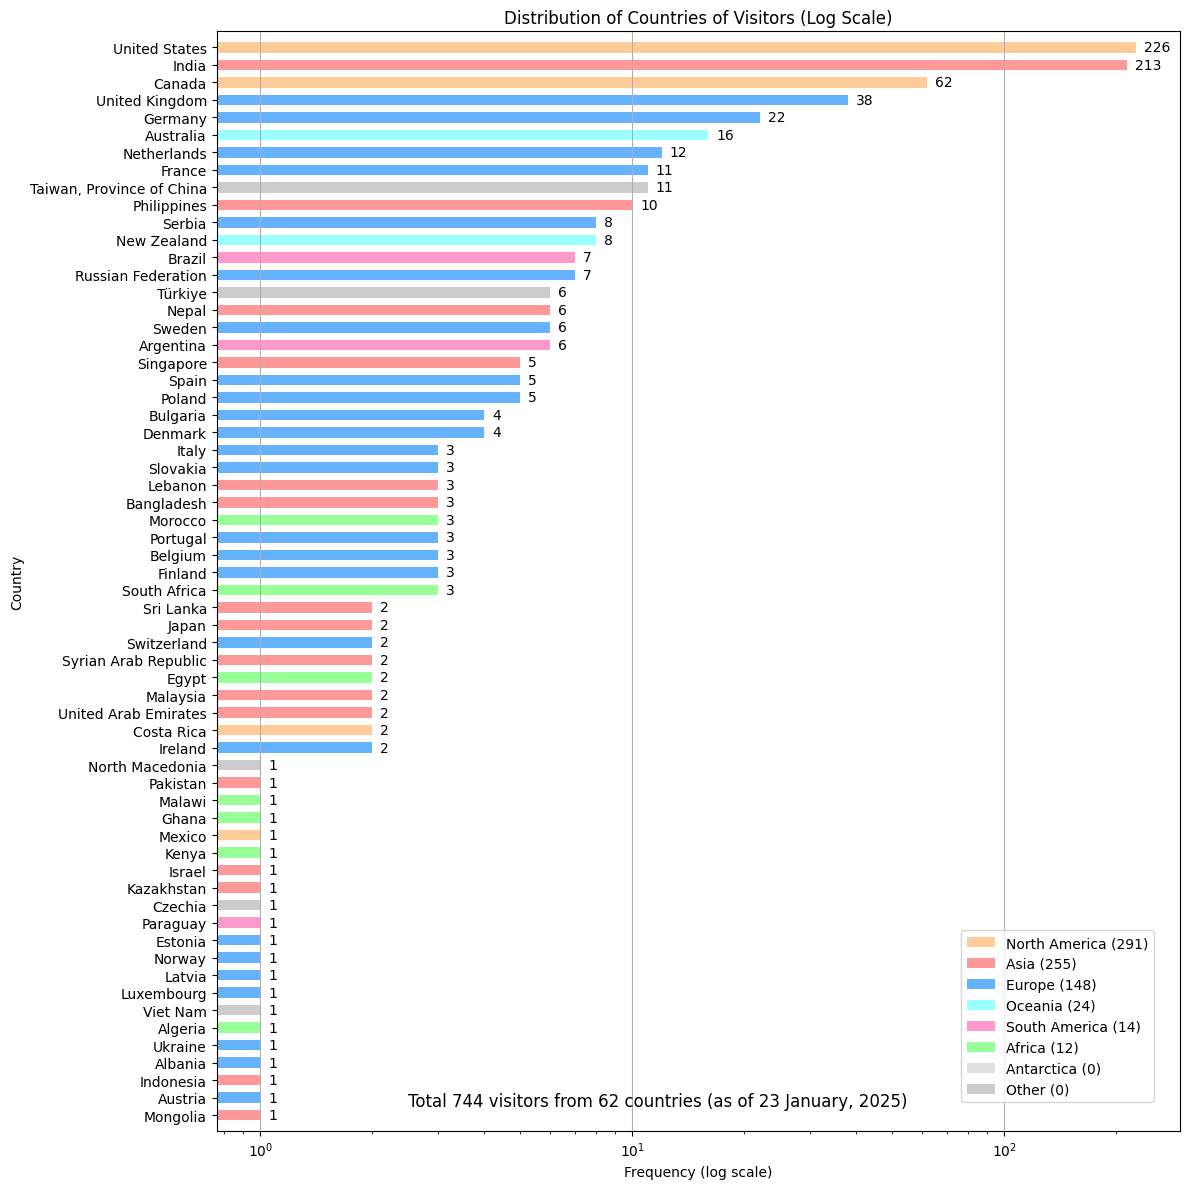

In [50]:
plt.figure(figsize=(12, 12))

bars = plt.barh(list(sorted_countries.keys()), list(sorted_countries.values()), height=0.6, color=colors)
plt.xscale('log')

for bar in bars:
    width = bar.get_width()
    plt.text(width*1.05, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', 
            ha='left', va='center')
    
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=continent_colors[continent], label=f'{continent} ({continent_count[continent]})')
                  for continent in sorted_count.keys()]
plt.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.98, 0.02))

plt.yticks(rotation=0)
plt.title('Distribution of Countries of Visitors (Log Scale)')
plt.text(2.5, 0.5, f'Total {total_visitors} visitors from {total_countries} countries (as of {x_date.strftime("%d %B, %Y")})', fontsize=12)
plt.xlabel('Frequency (log scale)')
plt.ylabel('Country')
plt.margins(y=0.01)  
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()
